In [1]:
from sklearn import datasets

In [2]:
import numpy as np

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:, [2, 3]]

In [5]:
y = iris.target

In [6]:
print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_train_std = sc.transform(X_train)

In [13]:
X_test_std = sc.transform(X_test)

In [14]:
from sklearn.linear_model import Perceptron

In [15]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0, shuffle=True)

In [16]:
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [17]:
y_pred = ppn.predict(X_test_std)

In [18]:
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [19]:
from sklearn.metrics import accuracy_score

In [20]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [21]:
X_combined_std = np.vstack((X_train_std, X_test_std))

In [22]:
y_combined = np.hstack((y_train, y_test))

In [23]:
from plot_decision_regions import plot_decision_regions

In [24]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))

In [25]:
import matplotlib.pyplot as plt

In [26]:
plt.xlabel('petal length [standardized]')

Text(0.5,0,'petal length [standardized]')

In [27]:
plt.ylabel('petal width [standardized]')

Text(0,0.5,'petal width [standardized]')

In [28]:
plt.legend(loc='upper left')

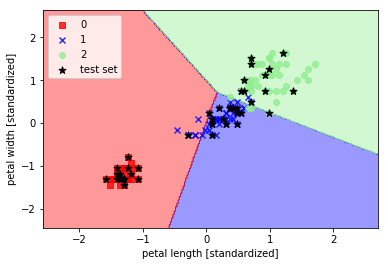

In [29]:
plt.show()